**I. PRE-PROCESSING DATA**

**1.	Data Loading**

Import related library

In [132]:
# Loading primary libraries.
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
!pip install pyLDAvis # Installing pyLDAvis
import pyLDAvis # Importing the correct module name: pyLDAvis instead of pyLDavis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Load selected dataset from Twitter Dataset to Google Colab file repository

In [133]:
# After upload, Colab stores the file in the environment, you can use its name directly
file_path = 'Twitter_Dataset.xlsx'  # Replace with the exact uploaded file name

# Open a specific sheet by name or index
df = pd.read_excel(file_path, sheet_name='3_Good_health_and_wellbeing')  # By sheet name

**2.	Data Exploration**

View a summary of the dataset

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           2277 non-null   object        
 1   Day                 2277 non-null   datetime64[ns]
 2   Year                2277 non-null   int64         
 3   Tweet_ID            2277 non-null   int64         
 4   Username            2277 non-null   object        
 5   User_ID             2277 non-null   int64         
 6   Text                2277 non-null   object        
 7   Hashtags            610 non-null    object        
 8   Language            2277 non-null   object        
 9   Retweet_Count       2277 non-null   int64         
 10  Favorite_Count      2277 non-null   int64         
 11  Reply_Count         2277 non-null   int64         
 12  Quote_Count         2277 non-null   int64         
 13  Is_Quote_Status     2277 non-null   bool        

In [135]:
#display column name of datasets
df.columns

Index(['Timestamp', 'Day', 'Year', 'Tweet_ID', 'Username', 'User_ID', 'Text',
       'Hashtags', 'Language', 'Retweet_Count', 'Favorite_Count',
       'Reply_Count', 'Quote_Count', 'Is_Quote_Status', 'Possibly_Sensitive'],
      dtype='object')

In [136]:
# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
                   Timestamp        Day  Year             Tweet_ID  \
0  2018-04-13 18:44:28+00:00 2018-04-13  2018   984864914966637952   
1  2019-11-08 12:08:55+00:00 2019-11-08  2019  1192776007377220096   
2  2020-04-02 06:26:01+00:00 2020-04-02  2020  1245598340730909952   
3  2020-06-04 11:09:57+00:00 2020-06-04  2020  1268500233195000064   
4  2020-07-21 11:39:55+00:00 2020-07-21  2020  1285540002592509952   

          Username              User_ID  \
0  Harsha de Silva           1968865952   
1  Harsha de Silva           1968865952   
2      NewsWire 🇱🇰  1176546593861819904   
3  Harsha de Silva           1968865952   
4      NewsWire 🇱🇰  1176546593861819904   

                                                Text  \
0  No we are not #1. You probably didn’t know I a...   
1  In our manifesto, we have recognized air and w...   
2  Public Health Inspectors involved in Covid19 r...   
3  As former VP of Nat Council for Mental Health ...   
4  Dengue 

In [137]:
# Display the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(df.tail())


Last 5 rows of the dataset:
                      Timestamp        Day  Year             Tweet_ID  \
2272  2024-09-19 09:31:39+00:00 2024-09-19  2024  1836699667385420032   
2273  2024-09-19 09:33:13+00:00 2024-09-19  2024  1836700061117390080   
2274  2024-09-19 09:40:40+00:00 2024-09-19  2024  1836701935195320064   
2275  2024-09-19 09:48:14+00:00 2024-09-19  2024  1836703838511709952   
2276  2024-09-19 10:01:58+00:00 2024-09-19  2024  1836707294513370112   

                Username              User_ID  \
2272       New Scientist             19658826   
2273           Nate Bear  1543531119294929920   
2274          WGHNigeria  1286930684859350016   
2275         Remote Hero  1669346242206520064   
2276  Queen Of The South  1232645166881809920   

                                                   Text  \
2272  Evidence is growing that the brain undergoes d...   
2273  I know we were all traumatised by covid in our...   
2274  Meet Dr Funmi Adewara, this week’s #HeroineofH...   
2

In [138]:
#Descriptive Statistics
df.describe()

,Day,Year,Tweet_ID,User_ID,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Possibly_Sensitive
count,2277,2277.000000,2.277000e+03,2.277000e+03,2277.000000,2277.000000,2277.000000,2277.000000,1573.000000
mean,2024-08-04 17:34:51.699604480,2023.930610,1.820355e+18,6.012975e+17,634.971893,3442.733421,198.837505,95.600791,0.002543
min,2018-04-13 00:00:00,2018.000000,9.848649e+17,3.832000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-09-09 00:00:00,2024.000000,1.833165e+18,1.708108e+08,1.000000,4.000000,0.000000,0.000000,0.000000
50%,2024-09-11 00:00:00,2024.000000,1.833937e+18,3.037130e+09,6.000000,16.000000,2.000000,0.000000,0.000000
75%,2024-09-16 00:00:00,2024.000000,1.835635e+18,1.297794e+18,85.000000,335.000000,29.000000,5.000000,0.000000
max,2024-09-19 00:00:00,2024.000000,1.836707e+18,1.827576e+18,38051.000000,262661.000000,36781.000000,28305.000000,1.000000
std,NaN,0.346357,5.107845e+16,6.855293e+17,2520.870679,14371.762426,1135.812239,771.947698,0.050379


**3.	Data Cleaning**

In our NLP dataset, handling missing values depends on the columns analyzed. For the 'Text' column, we can either leave missing values as is or fill them with context-appropriate content. Here, we'll demonstrate the second option to show how it works.

**Missing values  removal**

In [139]:
#Display missing value in dataset
missing_values = df.isna().sum()
print(f'Number of missing values in each columns: {missing_values}')

Number of missing values in each columns: Timestamp                0
Day                      0
Year                     0
Tweet_ID                 0
Username                 0
User_ID                  0
Text                     0
Hashtags              1667
Language                 0
Retweet_Count            0
Favorite_Count           0
Reply_Count              0
Quote_Count              0
Is_Quote_Status          0
Possibly_Sensitive     704
dtype: int64


Upon examining the dataset, it was found that both the 'Hashtags' and 'Possibly_Sensitive' columns contain a significant number of missing values. Since both columns have a large number of missing entries, removing these rows is not a viable option as it would lead to substantial data loss.



*  The missing values in 'Hashtags' are filled with the placeholder string 'No Hashtag' to maintain the dataset’s integrity.
*  Only 4 rows in 'Possibly_Sensitive' are marked 'True' due to sensitive content. Missing values are filled contextually to reflect sensitivity accurately without affecting the analysis.

In [140]:
# Check for missing values initially
print("Initial missing values in each column:")
print(df.isnull().sum())

# Fill missing values in 'Hashtags' with "No Hashtags"
df['Hashtags'].fillna('No Hashtag', inplace=True)

# Fill missing values in 'Possibly_Sensitive' with "Not Classified Yet"
df['Possibly_Sensitive'].fillna('Not Classified Yet', inplace=True)

# Verify that missing values have been filled
print("\nMissing values after filling:")
print(df.isnull().sum())

# Display a few rows to confirm changes
df.head()

Initial missing values in each column:
Timestamp                0
Day                      0
Year                     0
Tweet_ID                 0
Username                 0
User_ID                  0
Text                     0
Hashtags              1667
Language                 0
Retweet_Count            0
Favorite_Count           0
Reply_Count              0
Quote_Count              0
Is_Quote_Status          0
Possibly_Sensitive     704
dtype: int64

Missing values after filling:
Timestamp             0
Day                   0
Year                  0
Tweet_ID              0
Username              0
User_ID               0
Text                  0
Hashtags              0
Language              0
Retweet_Count         0
Favorite_Count        0
Reply_Count           0
Quote_Count           0
Is_Quote_Status       0
Possibly_Sensitive    0
dtype: int64


<ipython-input-140-65d122649d8f>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not Classified Yet' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Possibly_Sensitive'].fillna('Not Classified Yet', inplace=True)


,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,Harsha de Silva,1968865952,No we are not #1. You probably didn’t know I a...,No Hashtag,en,0,15,9,0,False,0.0
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,Harsha de Silva,1968865952,"In our manifesto, we have recognized air and w...",No Hashtag,en,23,161,24,3,False,0.0
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,NewsWire 🇱🇰,1176546593861819904,Public Health Inspectors involved in Covid19 r...,No Hashtag,en,2,5,0,0,False,0.0
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,Harsha de Silva,1968865952,As former VP of Nat Council for Mental Health ...,"SriLanka,JusticeForThariq",en,57,270,17,7,True,Not Classified Yet
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,NewsWire 🇱🇰,1176546593861819904,Dengue Prevention Assistant involved in COVID ...,No Hashtag,en,6,39,1,2,False,0.0


**Standardize String Columns to Lowercase**

In [141]:
# Transform all string columns to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Display the first few rows to confirm the changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not #1. you probably didn’t know i a...,no hashtag,en,0,15,9,0,False,NaN
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,"in our manifesto, we have recognized air and w...",no hashtag,en,23,161,24,3,False,NaN
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,no hashtag,en,2,5,0,0,False,NaN
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,not classified yet
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,no hashtag,en,6,39,1,2,False,NaN


**Remove Twitter Mentions and Clean Text Data**

In [142]:
import re
# Function to remove Twitter user mentions and clean up the text
def remove_twitter_ids(tweet):
    # Remove any '@' mentions, special characters (except spaces), and URLs
    mention_removed_tweet = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet))
    # Remove extra spaces
    spaces_removed = re.sub(r"\s\s+", " ", mention_removed_tweet).strip()
    return spaces_removed

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_twitter_ids)

# Display the first few rows to confirm changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not 1 you probably didnt know i am s...,no hashtag,en,0,15,9,0,False,NaN
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,in our manifesto we have recognized air and wa...,no hashtag,en,23,161,24,3,False,NaN
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,no hashtag,en,2,5,0,0,False,NaN
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,not classified yet
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,no hashtag,en,6,39,1,2,False,NaN


**Duplicate Removal**

Checking for duplicates is crucial, as tweets extracted from the Twitter API may appear multiple times. We can use the pandas drop_duplicates() function to handle this.

In [143]:
# Check duplicate tweets count in the 'Text' column
duplicate_count = len(df['Text']) - len(df['Text'].drop_duplicates())

print('Duplicate count:', duplicate_count)
print('Total records before removing duplicates:', df.shape[0])

Duplicate count: 45
Total records before removing duplicates: 2277


In [144]:
# Identify duplicate rows based on the 'Text' column
duplicates = df[df['Text'].duplicated(keep=False)]
# Display the duplicate rows
print("Duplicate rows based on 'Text':")
print(duplicates)

Duplicate rows based on 'Text':
                      Timestamp        Day  Year             Tweet_ID  \
37    2023-04-02 14:30:00+00:00 2023-04-02  2023  1642534853206840064   
62    2023-08-14 18:45:01+00:00 2023-08-14  2023  1691159003760369920   
74    2023-09-09 00:51:05+00:00 2023-09-09  2023  1700310824605319936   
122   2023-12-28 13:17:25+00:00 2023-12-28  2023  1740361309584240128   
176   2024-03-28 12:05:45+00:00 2024-03-28  2024  1773320571981329920   
...                         ...        ...   ...                  ...   
2250  2024-09-19 08:19:09+00:00 2024-09-19  2024  1836681423354490112   
2257  2024-09-19 08:53:58+00:00 2024-09-19  2024  1836690183317509888   
2266  2024-09-19 09:19:18+00:00 2024-09-19  2024  1836696558311529984   
2267  2024-09-19 09:20:47+00:00 2024-09-19  2024  1836696931684529920   
2268  2024-09-19 09:23:05+00:00 2024-09-19  2024  1836697509869250048   

                          Username              User_ID  \
37                        𝙋𝙖𝙢𝙢𝙮 

In [145]:
# Drop duplicates in the 'Text' column (keep the first tweet of each duplicate)
df = df.drop_duplicates(subset='Text', keep="first")

# Print the updated record count
print('Updated record count:', df.shape[0])

Updated record count: 2232


**Remove Punctuation and Retain Text Only**

In [146]:
# Remove punctuations from 'Text' column using regular expressions
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Display the first few rows to confirm changes
df.head(5)

<ipython-input-146-a4b5cba525ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)


,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not 1 you probably didnt know i am s...,no hashtag,en,0,15,9,0,False,NaN
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,in our manifesto we have recognized air and wa...,no hashtag,en,23,161,24,3,False,NaN
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,no hashtag,en,2,5,0,0,False,NaN
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,not classified yet
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,no hashtag,en,6,39,1,2,False,NaN


In [147]:
# Define a function to remove emojis and other icons
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # other miscellaneous symbols
        u"\U00002600-\U000026FF"  # more symbols
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Apply the function to the 'Text'column
df['Text'] = df['Text'].apply(remove_emojis)

# Display the first few rows to confirm changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not 1 you probably didnt know i am s...,no hashtag,en,0,15,9,0,False,NaN
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,in our manifesto we have recognized air and wa...,no hashtag,en,23,161,24,3,False,NaN
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,no hashtag,en,2,5,0,0,False,NaN
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,not classified yet
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,no hashtag,en,6,39,1,2,False,NaN


**II. STOP-WORD AND COMMON WORD REMOVAL**

**1. Stop-word removal**

In [148]:
#Remove stop words
# Load NLTK library
import nltk

# Download the stopwords to the nltk library
nltk.download('stopwords')

# Load the stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
# get the list of all stopwords from the library
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We will need stop.remove('not') to retain 'not' for preserving negation and sentiment context in text analysis.

In [150]:
stop.remove('not')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

In [151]:
# Function to remove stop words from a tweet
def remove_stop_words(tweet):
    tokens = tweet.split()
    stop_removed_tokens = [t for t in tokens if t not in stop]
    convert_to_string = " ".join(stop_removed_tokens)
    return convert_to_string

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_stop_words)

# Display the first 5 rows to confirm changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,not 1 probably didnt know seriously involved m...,no hashtag,en,0,15,9,0,False,NaN
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,manifesto recognized air water pollution natio...,no hashtag,en,23,161,24,3,False,NaN
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved covid19 rela...,no hashtag,en,2,5,0,0,False,NaN
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,former vp nat council mental health sahanaya k...,"srilanka,justiceforthariq",en,57,270,17,7,True,not classified yet
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved covid wor...,no hashtag,en,6,39,1,2,False,NaN


**Try standardization of tweets**

We will use stemming with the NLTK library to standardize tweets by removing prefixes, suffixes, and other word parts to derive their base forms.

In [152]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to apply stemming to a sentence
def stemming_function(sent):
    word_list = sent.split()
    stemmed_word_list = [stemmer.stem(word) for word in word_list]
    stemmed_sentence = " ".join(stemmed_word_list)
    return stemmed_sentence

# Apply the stemming function to the 'Text' column
df['Text_stem'] = df['Text'].apply(stemming_function)

# Compare the original vs. stemmed content
df[['Text', 'Text_stem']].head(5)

,Text,Text_stem
0,not 1 probably didnt know seriously involved m...,not 1 probabl didnt know serious involv mental...
1,manifesto recognized air water pollution natio...,manifesto recogn air water pollut nation publi...
2,public health inspectors involved covid19 rela...,public health inspector involv covid19 relat w...
3,former vp nat council mental health sahanaya k...,former vp nat council mental health sahanaya k...
4,dengue prevention assistant involved covid wor...,dengu prevent assist involv covid work join pu...


Stemming changed 'probably' to 'probabl,' which isn't ideal. We'll use the original content for better results.

**2. Identify and Remove Common Words**

**Initial Word Frequency Analysis**

In [153]:
# Create a word frequency series from the 'Text' column
word_frequency = pd.Series(' '.join(df['Text']).split()).value_counts()
#Top 10 words
word_frequency[:10]

,count
health,1854
public,827
mental,748
healthcare,397
healthy,353
access,338
not,319
living,309
amp,274
people,247


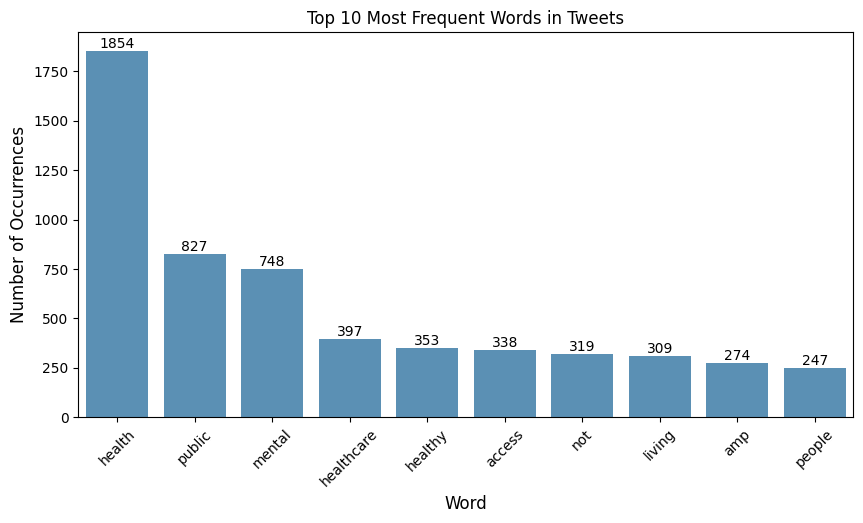

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 words from word_frequency
word_count = word_frequency
word_count = word_count[:10,]
# Visualize the top 10 word counts
plt.figure(figsize=(10, 5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Top 10 Most Frequent Words in Tweets')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)

# Add the count values on top of each bar
for index, value in enumerate(word_count.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

Now, we will create a visualization of the text corpus that we constructed after the pre-processing steps. This visualization aims to highlight the most frequently occurring words within the corpus, providing us with a clearer understanding of common themes and patterns present in the data. By analyzing this visualization, we can identify key terms, potential trends, and areas of focus within the text, which will help in gaining insights and directing further analysis.

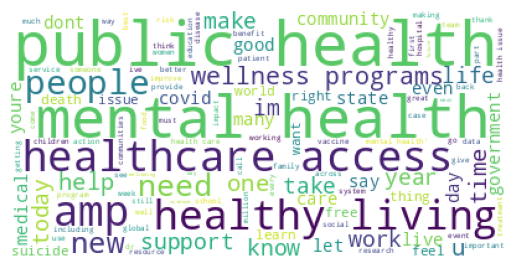

In [155]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
corpus = list(df['Text'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From the visualization, since the topic is about Good Health and Wellbeing, words like "health", "public", "mental", "access", "amp" are mentioned frequently.

**Common Word Removal**


The words "health," "public," "mental," "access," and "amp" are removed due to their overly broad or irrelevant usage within the "Good Health and Wellbeing" context. "Health," "public," "mental," and "access" are general terms that frequently occur but do not add specificity to the analysis, making it difficult to focus on more detailed topics. "Amp" appears to be a formatting artifact or noise, offering no meaningful content and thus is excluded to improve clarity in text analysis.

In [156]:
# Creating a list of custom stopwords based on our analysis
new_words_to_remove = ["health", "public", "mental", "access", "amp"]

In [157]:
# Remove common words using the lambda function
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in new_words_to_remove))

# Display the first 5 rows to confirm changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive,Text_stem
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,not 1 probably didnt know seriously involved s...,no hashtag,en,0,15,9,0,False,NaN,not 1 probabl didnt know serious involv mental...
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,manifesto recognized air water pollution natio...,no hashtag,en,23,161,24,3,False,NaN,manifesto recogn air water pollut nation publi...
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,inspectors involved covid19 related work threa...,no hashtag,en,2,5,0,0,False,NaN,public health inspector involv covid19 relat w...
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,former vp nat council sahanaya know little und...,"srilanka,justiceforthariq",en,57,270,17,7,True,not classified yet,former vp nat council mental health sahanaya k...
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved covid wor...,no hashtag,en,6,39,1,2,False,NaN,dengu prevent assist involv covid work join pu...


**III. WORD FREQUENCIES AND WORD CLOUD**

**1. Refined Word Frequency Analysis**

We will re-attempt to compose a frequency appearing word list.

In [158]:
# Create a word frequency series from the 'Text' column
word_frequency = pd.Series(' '.join(df['Text']).split()).value_counts()
#Top 10 words
word_frequency[:10]

,count
healthcare,397
healthy,353
not,319
living,309
people,247
wellness,217
us,189
programs,184
like,169
care,162


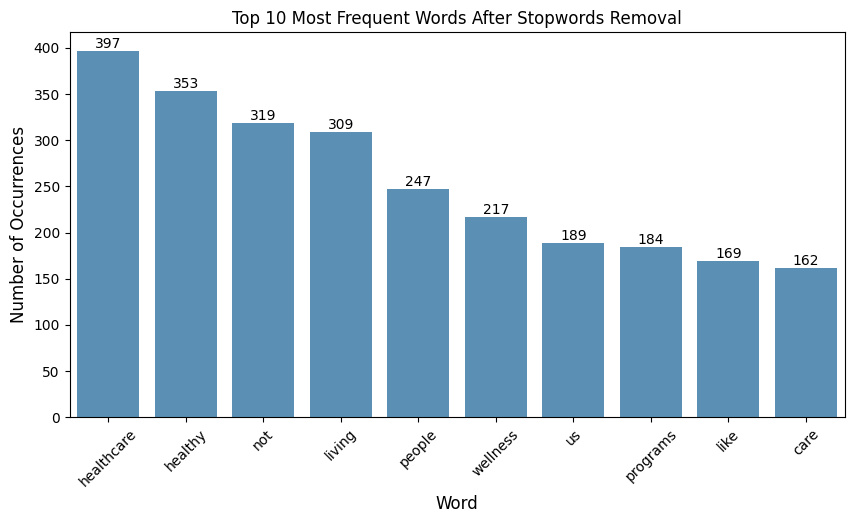

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Get the top 10 words from word_frequency
# Assuming 'word_frequency' is the intended variable
top_10_words = word_frequency[:10]  # Use 'word_frequency' directly
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_words.index, y=top_10_words.values, alpha=0.8)
plt.title('Top 10 Most Frequent Words After Stopwords Removal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)

# Add the count values on top of each bar
for index, value in enumerate(top_10_words.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

**2. Refined Word Cloud**

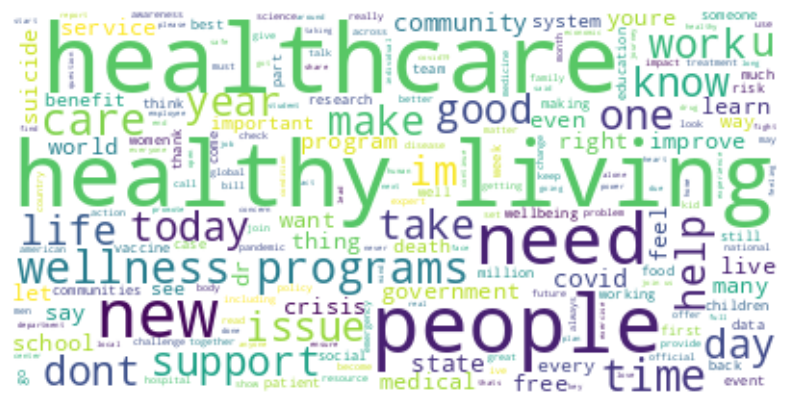

In [160]:
from PIL import Image
from wordcloud import WordCloud


# Create a list of all text data from the 'Text' column
corpus = list(df['Text'])

# Generate the word cloud from the corpus
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(' '.join(corpus))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()